In [2]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Load the saved file
df = pd.read_csv("data/train_cleaned.csv")

# Check for NaNs (sometimes cleaning turns "..." into empty space)
df.dropna(inplace=True)

In [3]:
#Split the data for vectorization 
X = df['text_for_baseline']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
#Perform vectorization 
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)

print("Shape of X_train after vectorization:", X_train_vectorized.shape)
print("Shape of X_test after vectorization:", X_test_vectorized.shape)

Shape of X_train after vectorization: (12800, 5000)
Shape of X_test after vectorization: (3200, 5000)


In [6]:
#Training the model
model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000)
try:
   model.fit(X_train_vectorized, y_train)# ensuring that the vectorized values are inserted for the computer to understand
except ValueError:
  print("The value has wrong format")
except:
  print("Something else went wrong")


In [7]:
#Making predictions 
predictions = model.predict(X_test_vectorized)

In [8]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Load the saved file
df = pd.read_csv("data/train_cleaned.csv")

# Check for NaNs (sometimes cleaning turns "..." into empty space)
df.dropna(inplace=True)

In [9]:
#Split the data for vectorization 
X = df['text_for_baseline']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
#Perform vectorization 
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)

print("Shape of X_train after vectorization:", X_train_vectorized.shape)
print("Shape of X_test after vectorization:", X_test_vectorized.shape)

Shape of X_train after vectorization: (12800, 5000)
Shape of X_test after vectorization: (3200, 5000)


In [11]:
#Training the model
model = LogisticRegression()
try:
   model.fit(X_train_vectorized, y_train)# ensuring that the vectorized values are inserted for the computer to understand
except ValueError:
  print("The value has wrong format")
except:
  print("Something else went wrong")


In [13]:
#Making predictions 
predictions = model.predict(X_test_vectorized)


Classification Report:
              precision    recall  f1-score   support

     Sadness     0.8815    0.9355    0.9077       946
         Joy     0.8026    0.9598    0.8742      1021
        Love     0.8737    0.5845    0.7004       296
       Anger     0.8987    0.7892    0.8404       427
        Fear     0.8477    0.7431    0.7919       397
    Surprise     0.8704    0.4159    0.5629       113

    accuracy                         0.8491      3200
   macro avg     0.8624    0.7380    0.7796      3200
weighted avg     0.8533    0.8491    0.8423      3200



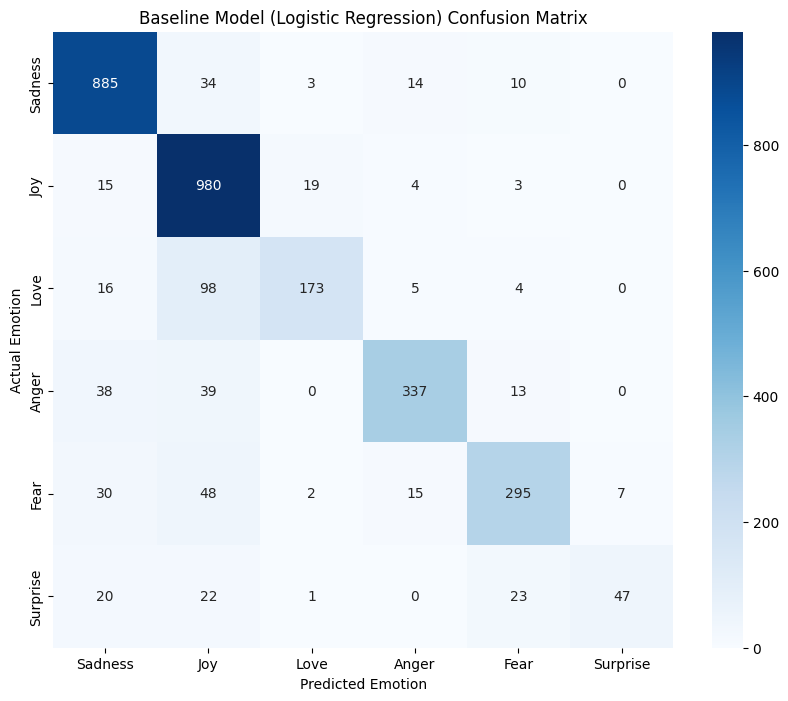

In [14]:
#Creating the confusion matrix for clearer view 
target_names = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=target_names, digits=4))

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual Emotion')
plt.xlabel('Predicted Emotion')
plt.title('Baseline Model (Logistic Regression) Confusion Matrix')
plt.show()
